Notebook example for calculation of a Tranformation Matrix.

First of all, I genrate  20*N_frame array, relative to 20 energy sets obtained with 20 sets of charges that are Aduri charges plus perturbations drawn from gaussain distribution with 0 average and standard deviation of 1 e


In [1]:
import panedr
import numpy as np
import matplotlib.pyplot as plt


ME=[]
for i in range(20):
    em = "Rerun/rerun"+str(i+1)+"_lam15.edr"
    df = panedr.edr_to_df(em)
    ME.append(np.array(df[u'Potential']))
ME=np.array(ME)

also energies for the unperturbated case are loaded

In [2]:
em = "lam15/ener_trj_conc.edr"
df = panedr.edr_to_df(em)
E0=np.array(df[u'Potential'])

DeQs and relative combinations (DeQ1*DeQ1, DeQ1*DeQ1, etc.) are loaded

In [4]:
vQ=np.load("../DeQs_matrix.npy")
vQ

array([[-4.04318909e-01, -1.83846920e+00,  4.98887820e-01,
         1.31954480e+00, -8.79229298e-01, -1.78051872e+00,
        -2.38504532e+00,  3.50485676e-01, -5.92256750e-01,
        -4.61147821e-01,  1.46084855e+00,  1.33568040e+00,
         5.94181438e-02, -2.62034325e-01, -1.00308138e+00,
        -2.41695092e+00, -1.16138601e+00,  4.70105080e-01,
         1.60581075e-02, -5.14091445e-01],
       [ 1.63473780e-01,  3.37996900e+00,  2.48889057e-01,
         1.74119849e+00,  7.73044158e-01,  3.17024691e+00,
         5.68844116e+00,  1.22840209e-01,  3.50768058e-01,
         2.12657313e-01,  2.13407849e+00,  1.78404214e+00,
         3.53051582e-03,  6.86619876e-02,  1.00617224e+00,
         5.84165177e+00,  1.34881747e+00,  2.20998787e-01,
         2.57862818e-04,  2.64290014e-01],
       [ 6.98049176e-01, -5.90535993e-01,  1.53127354e+00,
         1.28769041e+00, -4.33493240e-01,  1.17319282e-02,
         1.33060244e+00, -1.36374737e+00,  5.03893693e-02,
         2.12289865e+00,  3.6

energies obtained with rerun mode of gromacs for a set of test charges (testN3) are loaded

In [10]:
em = "Rerun/testN3_rerun_lam15.edr"
df = panedr.edr_to_df(em)
N3=np.array(df[u'Potential'])

DeQs and combination relative to testN3 cases

In [5]:
dq=[-0.06,0.03,-0.03,0,0.02] #deQ corrispondenti al rerun testN3
v0=[]
for i in range(5):
    v0.append(dq[i])
    v0.append(dq[i]*dq[i])
for i in range(4):
    for k in range(4-i):
        v0.append(dq[i]*dq[i+1+k])

Calculating the Transformation Matrix

In [6]:
TrM=[]
for i in range(len(E0)):
    b= ME[:,i]-E0[i]
    x = np.linalg.inv(np.transpose(vQ)).dot(b)
    
    TrM.append(x)

Checking differences in DeU for testN3 charges, computed thorugh the Transformation Matrix or with gmx -rerun. The differences are significative only for really high energies (which have almost no impact on Free Energy calcula

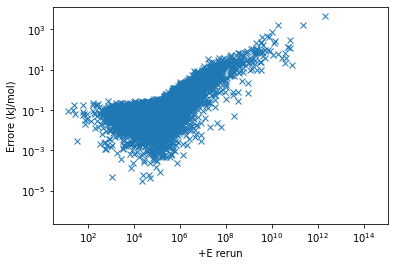

In [11]:
plt.plot(ME.mean(0),np.abs(N3-E0-np.matmul(TrM,v0)),'x')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Errore (kJ/mol)')
plt.xlabel('+E rerun')
plt.show()

In [12]:
np.save("Trans_vectors",TrM)